<a href="https://colab.research.google.com/github/MustafArikan/Plant-Disease-Detection-with-Deep-Learning/blob/main/Plant_Disease_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Veriler Drive'dan Colab'in yerel diskine kopyalanıyor... (Bu 2-3 dk sürebilir, bekle)
Kopyalama tamamlandı! Artık eğitim çok hızlı olacak.
Hızlı Train yolu hazır: /content/temp_data/train

--- Eğitim (Train) Verisi Yükleniyor ---
Found 18345 images belonging to 10 classes.

--- Doğrulama (Validation) Verisi Yükleniyor ---
Found 4585 images belonging to 10 classes.

Sınıflar (10 adet): ['Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___Tomato_mosaic_virus', 'Tomato___healthy']

Model kuruluyor...
Eğitim başlıyor... (Hızlı Mod)


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 441ms/step - accuracy: 0.5573 - loss: 1.3029

574/574 ━━━━━━━━━━━━━━━━━━━━ 288s 468ms/step - accuracy: 0.5575 - loss: 1.3023 - val_accuracy: 0.8052 - val_loss: 0.5938
Epoch 2/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8047 - loss: 0.5867

574/574 ━━━━━━━━━━━━━━━━━━━━ 251s 438ms/step - accuracy: 0.8047 - loss: 0.5867 - val_accuracy: 0.8212 - val_loss: 0.5240
Epoch 3/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step - accuracy: 0.8332 - loss: 0.5054

574/574 ━━━━━━━━━━━━━━━━━━━━ 252s 438ms/step - accuracy: 0.8332 - loss: 0.5054 - val_accuracy: 0.8379 - val_loss: 0.4883
Epoch 4/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step - accuracy: 0.8321 - loss: 0.4863

574/574 ━━━━━━━━━━━━━━━━━━━━ 251s 438ms/step - accuracy: 0.8321 - loss: 0.4863 - val_accuracy: 0.8480 - val_loss: 0.4430
Epoch 5/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 249s 434ms/step - accuracy: 0.8419 - loss: 0.4524 - val_accuracy: 0.8423 - val_loss: 0.4568
Epoch 6/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 245s 427ms/step - accuracy: 0.8448 - loss: 0.4559 - val_accuracy: 0.8414 - val_loss: 0.4557
Epoch 7/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 249s 433ms/step - accuracy: 0.8499 - loss: 0.4277 - val_accuracy: 0.8462 - val_loss: 0.4368
Epoch 8/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step - accuracy: 0.8582 - loss: 0.4125

574/574 ━━━━━━━━━━━━━━━━━━━━ 248s 432ms/step - accuracy: 0.8582 - loss: 0.4126 - val_accuracy: 0.8650 - val_loss: 0.3940
Epoch 9/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 244s 425ms/step - accuracy: 0.8534 - loss: 0.4155 - val_accuracy: 0.8617 - val_loss: 0.4024
Epoch 10/10
574/574 ━━━━━━━━━━━━━━━━━━━━ 245s 426ms/step - accuracy: 0.8562 - loss: 0.4091 - val_accuracy: 0.8521 - val_loss: 0.4235

Grafik kaydedildi: /content/drive/MyDrive/Dataset/sonuc_grafigi.png


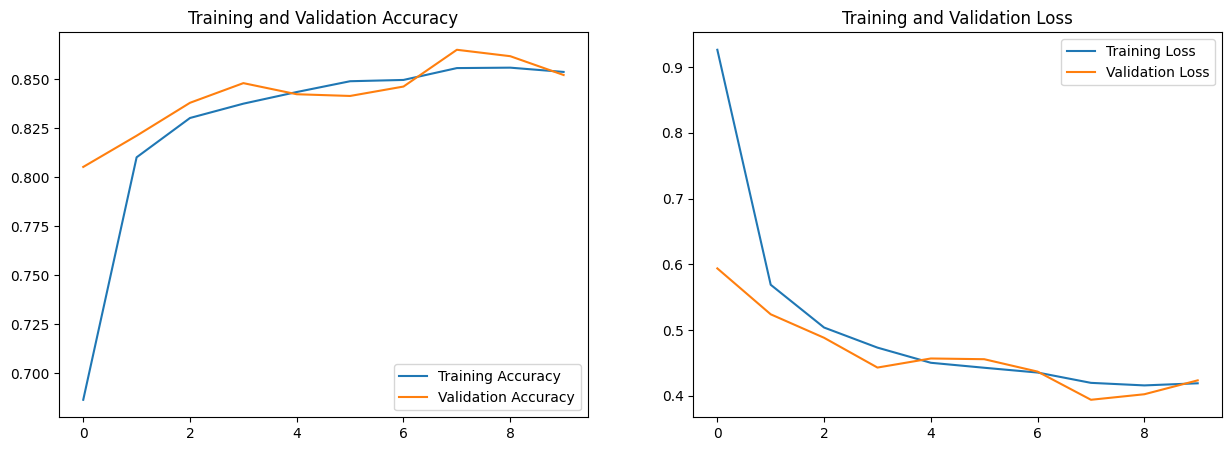

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt
import os
import shutil
from google.colab import drive

# 1. DRIVE BAĞLANTISI
drive.mount('/content/drive')

DRIVE_KAYNAK_YOLU = '/content/drive/MyDrive/DL_Sunum/Dataset'

COLAB_HEDEF_YOLU = '/content/temp_data'

print("Veriler Drive'dan Colab'in yerel diskine kopyalanıyor... (Bu 2-3 dk sürebilir, bekle)")

if not os.path.exists(COLAB_HEDEF_YOLU):
    shutil.copytree(DRIVE_KAYNAK_YOLU, COLAB_HEDEF_YOLU)
    print("Kopyalama tamamlandı! Artık eğitim çok hızlı olacak.")
else:
    print("Veriler zaten kopyalanmış, direkt devam ediliyor.")

# DAHA HIZLI OLMASI ICIN
ANA_KLASOR_YOLU = COLAB_HEDEF_YOLU

# Alt klasör isimleri (Drive'dakiyle aynı)
TRAIN_DIR_NAME = 'train'
VALID_DIR_NAME = 'valid'

train_dir = os.path.join(ANA_KLASOR_YOLU, TRAIN_DIR_NAME)
val_dir = os.path.join(ANA_KLASOR_YOLU, VALID_DIR_NAME)

# Kontrol
if not os.path.exists(train_dir):
    print(f"HATA: Train klasörü kopyalanamadı: {train_dir}")
else:
    print(f"Hızlı Train yolu hazır: {train_dir}")


# 2. VERİ HAZIRLIĞI (Data Augmentation)
IMG_SIZE = (224, 224)
BATCH_SIZE = 32
EPOCHS = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

print("\n--- Eğitim (Train) Verisi Yükleniyor ---")
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

print("\n--- Doğrulama (Validation) Verisi Yükleniyor ---")
validation_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

num_classes = len(train_generator.class_indices)
class_names = list(train_generator.class_indices.keys())
print(f"\nSınıflar ({num_classes} adet): {class_names}")

# 3. MODEL
print("\nModel kuruluyor...")
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 4. EĞİTİM (Modeli yine Drive'a kaydedelim ki silinmesin)
model_save_path = '/content/drive/MyDrive/Dataset/best_tomato_model.h5'

callbacks = [
    EarlyStopping(patience=3, monitor='val_loss', restore_best_weights=True),
    ModelCheckpoint(model_save_path, save_best_only=True, monitor='val_accuracy')
]

print("Eğitim başlıyor... (Hızlı Mod)")
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=EPOCHS,
    callbacks=callbacks
)

# 5. GRAFİK
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

# Grafiği Drive'a kaydet
grafik_yolu = '/content/drive/MyDrive/Dataset/sonuc_grafigi.png'
plt.savefig(grafik_yolu)
print(f"\nGrafik kaydedildi: {grafik_yolu}")
plt.show()

Karmaşıklık Matrisi hesaplanıyor...
Found 4585 images belonging to 10 classes.


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


144/144 ━━━━━━━━━━━━━━━━━━━━ 8s 55ms/step
Matris kaydedildi: confusion_matrix.png


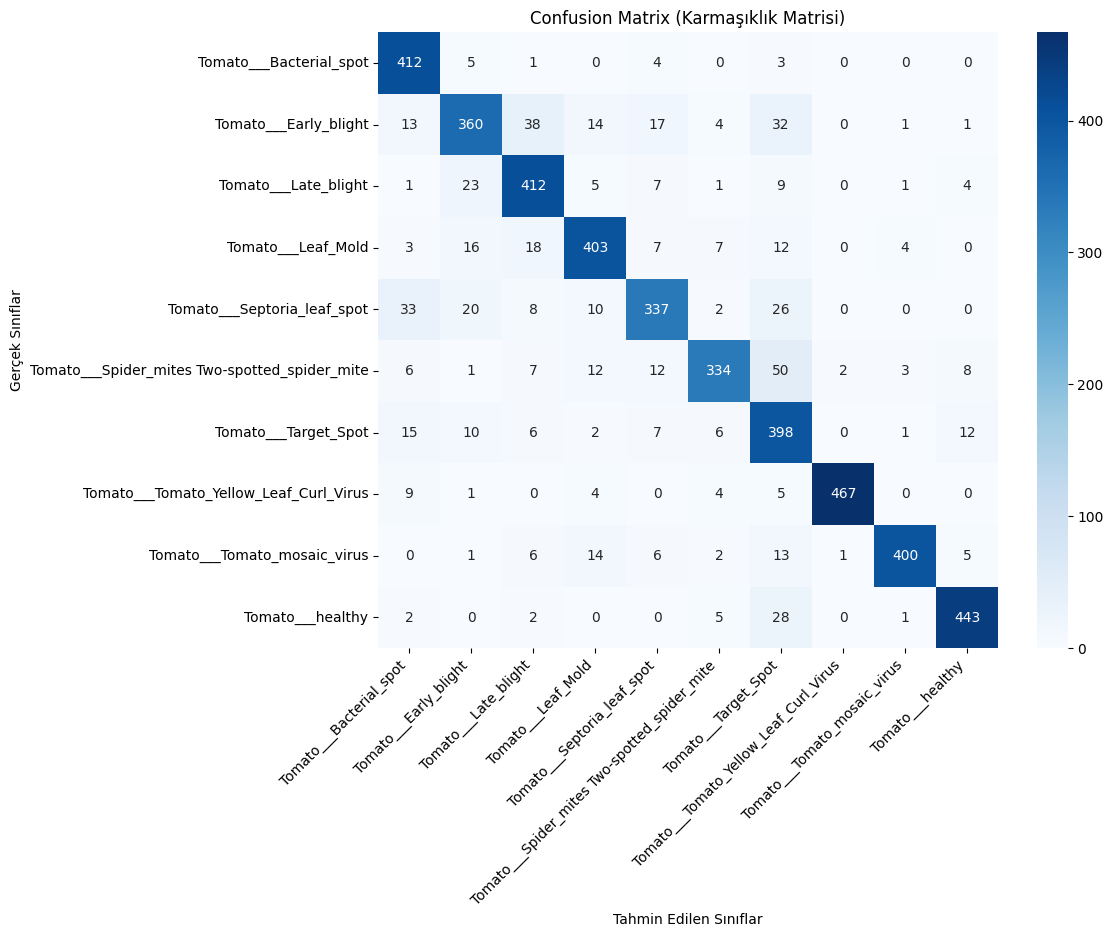


--- DETAYLI SINIFLANDIRMA RAPORU ---
                                               precision    recall  f1-score   support

                      Tomato___Bacterial_spot       0.83      0.97      0.90       425
                        Tomato___Early_blight       0.82      0.75      0.79       480
                         Tomato___Late_blight       0.83      0.89      0.86       463
                           Tomato___Leaf_Mold       0.87      0.86      0.86       470
                  Tomato___Septoria_leaf_spot       0.85      0.77      0.81       436
Tomato___Spider_mites Two-spotted_spider_mite       0.92      0.77      0.83       435
                         Tomato___Target_Spot       0.69      0.87      0.77       457
       Tomato___Tomato_Yellow_Leaf_Curl_Virus       0.99      0.95      0.97       490
                 Tomato___Tomato_mosaic_virus       0.97      0.89      0.93       448
                             Tomato___healthy       0.94      0.92      0.93       481

   

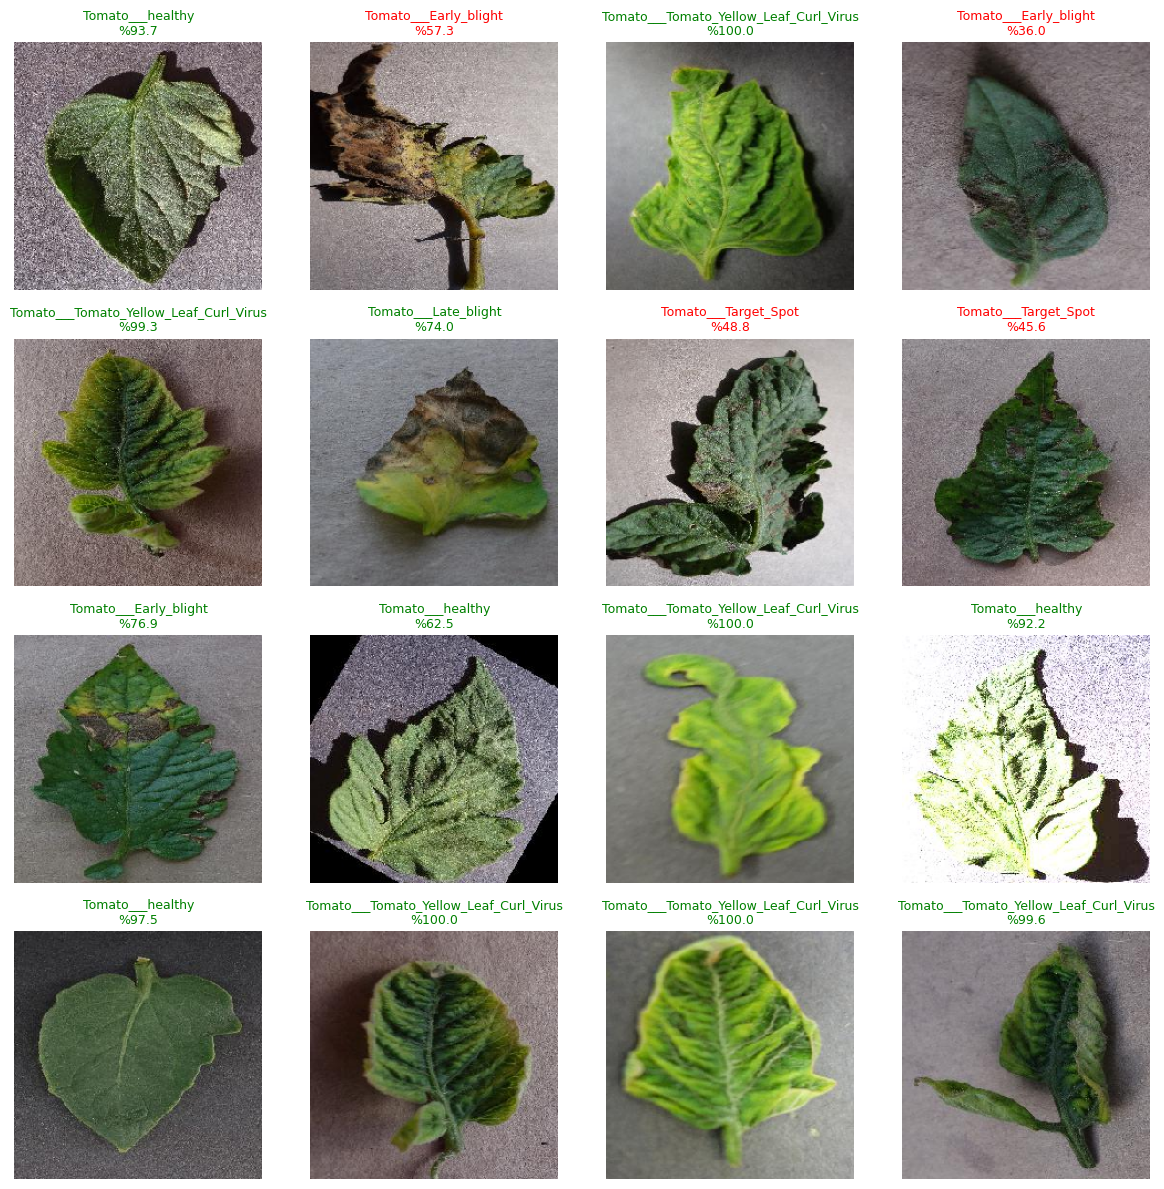

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing import image
import os

# Validation verisiyle MATRİS çiziyoruz (Verisi bol olduğu için)
# Drive'daki 'valid' klasörünün yolu (daha hızlı olması için colabden alındı):
VAL_DIR = '/content/temp_data/valid'

# 16 Resimlik Test klasörü (Burası kesin Drive yoludur)
TEST_DIR = '/content/drive/MyDrive/DL_Sunum/test'

# Sınıf isimlerini al
class_names = list(train_generator.class_indices.keys())

# 1. KARMAŞIKLIK MATRİSİ (CONFUSION MATRIX)
print("Karmaşıklık Matrisi hesaplanıyor...")

# Validation verisini 'karıştırmadan' (shuffle=False) tekrar yükle
val_gen_matrix = val_datagen.flow_from_directory(
    VAL_DIR,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False # KRİTİK: Sıralı olmazsa matris yanlış çıkar
)

# Tahmin yap
Y_pred = model.predict(val_gen_matrix)
y_pred = np.argmax(Y_pred, axis=1)
y_true = val_gen_matrix.classes

# Matrisi Çiz
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_true, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix (Karmaşıklık Matrisi)')
plt.ylabel('Gerçek Sınıflar')
plt.xlabel('Tahmin Edilen Sınıflar')
plt.xticks(rotation=45, ha='right')

# Matrisi Kaydet
plt.savefig('/content/drive/MyDrive/Dataset/confusion_matrix.png')
print("Matris kaydedildi: confusion_matrix.png")
plt.show()

# İstatistiksel Rapor
print("\n--- DETAYLI SINIFLANDIRMA RAPORU ---")
print(classification_report(y_true, y_pred, target_names=class_names))

# 2. GÖRSEL TAHMİN DEMOSU
print("\n--- TEST VERİSİ İLE TAHMİN DEMOSU ---")

test_images_files = []
for root, dirs, files in os.walk(TEST_DIR):
    for file in files:
        if file.endswith(('jpg', 'jpeg', 'png', 'JPG')):
            test_images_files.append(os.path.join(root, file))

# Sadece ilk 16 resmi alalım
test_images_files = test_images_files[:16]

if len(test_images_files) > 0:
    plt.figure(figsize=(12, 12))
    for i, img_path in enumerate(test_images_files):
        # Resmi yükle
        img = image.load_img(img_path, target_size=(224, 224))
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0) / 255.0

        # Tahmin et
        predictions = model.predict(img_array)
        predicted_idx = np.argmax(predictions)
        predicted_label = class_names[predicted_idx]
        confidence = np.max(predictions) * 100

        # Çizdir
        plt.subplot(4, 4, i+1)
        plt.imshow(img)
        # Başlık: Tahmin (Güven Oranı)
        # Eğer güven %50'den azsa kırmızı, yüksekse yeşil yaz
        color = 'green' if confidence > 60 else 'red'
        plt.title(f"{predicted_label}\n%{confidence:.1f}", color=color, fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('/content/drive/MyDrive/Dataset/test_demo_collage.png')
    print("Demo görseli kaydedildi: test_demo_collage.png")
    plt.show()
else:
    print(f"UYARI: '{TEST_DIR}' klasöründe resim bulunamadı. Yolu kontrol et!")